# Submission Belajar Machine Learning Untuk Pemula

* **Nama**      : Nurfian Qodar
* **Domisili**  : Kota Tasikmalaya, Jawa Barat
* **Email** : 77nurfianqodar@gmail.com
* **Beasiswa** : DBS Foundation Coding Camp


## Import Library

In [1]:
%%bash
pip install wget

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=1d34ddfbe1ae52cc1729147c51372505614db153488f44c6042932168ea0cde7
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import zipfile
import os
import wget

In [3]:
url = "https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip"
filename = "./rockpaperscissors.zip"
wget.download(url, filename)

'./rockpaperscissors.zip'

## Unzip file

In [4]:
filename = "./rockpaperscissors.zip"
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall("./")

## Data Generator

In [5]:
datagen = ImageDataGenerator(
    rotation_range=20,
    rescale=1./255,
    horizontal_flip=True,
    shear_range=0.2,
    validation_split=0.4,
)

## Data Train

In [6]:
train_generator = datagen.flow_from_directory(
    './rockpaperscissors/rps-cv-images',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    seed=42
)

Found 1314 images belonging to 3 classes.


## Data Validaton

In [7]:
val_generator = datagen.flow_from_directory(
    './rockpaperscissors/rps-cv-images',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42
)

Found 874 images belonging to 3 classes.


## Model

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')])

## Compiling Model

In [9]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

## Callback

In [10]:
stop_at_stuck = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

## Model Training

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks= [stop_at_stuck,]
)

Epoch 1/10
42/42 [==============================] - 101s 2s/step - loss: 0.9964 - accuracy: 0.5282 - val_loss: 0.6177 - val_accuracy: 0.7700
Epoch 2/10
42/42 [==============================] - 94s 2s/step - loss: 0.4569 - accuracy: 0.8250 - val_loss: 0.2732 - val_accuracy: 0.8993
Epoch 3/10
42/42 [==============================] - 94s 2s/step - loss: 0.2719 - accuracy: 0.9087 - val_loss: 0.2383 - val_accuracy: 0.9188
Epoch 4/10
42/42 [==============================] - 116s 3s/step - loss: 0.2048 - accuracy: 0.9262 - val_loss: 0.2589 - val_accuracy: 0.9119
Epoch 5/10
42/42 [==============================] - 115s 3s/step - loss: 0.1375 - accuracy: 0.9574 - val_loss: 0.1249 - val_accuracy: 0.9565
Epoch 6/10
42/42 [==============================] - 100s 2s/step - loss: 0.0985 - accuracy: 0.9658 - val_loss: 0.1325 - val_accuracy: 0.9600
Epoch 7/10
42/42 [==============================] - 95s 2s/step - loss: 0.1161 - accuracy: 0.9635 - val_loss: 0.3170 - val_accuracy: 0.8890
Epoch 8/10
42/42

## Manual Test

1/1 [==============================] - 0s 189ms/step
rock


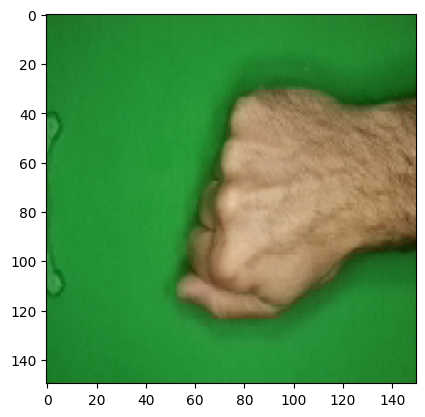

In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

path = "./rockpaperscissors/rock/0P6uxM8Vr1DwySHe.png"
img = image.load_img(path, target_size=(150,150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = x / 255.0
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

result = model.predict(images)[0]
max_index = np.argmax(result)

classes = train_generator.class_indices
classes = {v: k for k, v in classes.items()}
predicted_class = classes[max_index]

print(predicted_class)